In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-v0_8')

In [11]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)'
print(dist_02.shape)

(500, 2)
(500, 2)


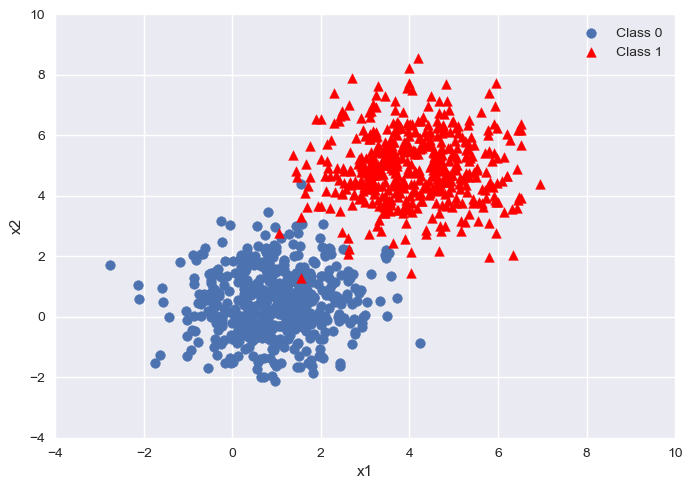

In [14]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [96]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [98]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [100]:
np.random.shuffle(data)
print(data[:10])

[[ 0.69304389 -0.02578256  0.        ]
 [ 6.50914668  6.38308848  1.        ]
 [ 0.50562726  0.35920987  0.        ]
 [ 3.43284052  3.71738912  1.        ]
 [ 5.32530721  6.32781491  1.        ]
 [ 0.52228244  0.89393516  0.        ]
 [ 4.46274691  6.10711628  1.        ]
 [ 0.70252904  0.02347283  0.        ]
 [ 2.93946668  4.38478667  1.        ]
 [ 3.27378908  5.99078909  1.        ]]


In [102]:
split = int(0.8*data.shape[0])

In [213]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [261]:
def hypothesis(x, w, b):
    hx = np.dot(x, w) + b
    return sigmoid(hx)

In [263]:
# y = 1 / (1 + e^(-hx))
def sigmoid(hx):
    return 1.0 / (1.0 + np.exp(-1.0*hx))

In [305]:
def error(x,y, w, b):
    err = 0.0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],w, b)
        err += y[i] * np.log2(hx)  + (1-y[i]) * np.log2(1-hx)
    return err / x.shape[0]

In [329]:
def get_grad(x, y, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    for i in range(x.shape[0]):
        hx= hypothesis(x[i], w, b)
        grad_w += (y[i] - hx) * x[i]
        grad_b += y[i] - hx
    return [grad_w / x.shape[0], grad_b / x.shape[0]]

In [378]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(x, y,w,b)
    [grad_w,grad_b] = get_grad(x,y, w,b)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [408]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [412]:
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()
loss = []
accuracy = []
for i in range(1000):
    l, W, b = gradient_descent(X_train, Y_train, W, b, learning_rate=0.1)
    accuracy.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)


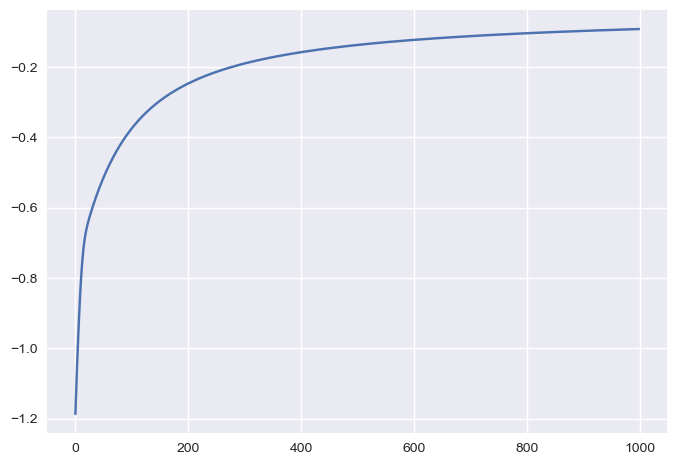

In [393]:
plt.plot(loss)
plt.show()

In [396]:
print(W)
print(b)

[0.64578231 1.32791452]
-4.788404641969026


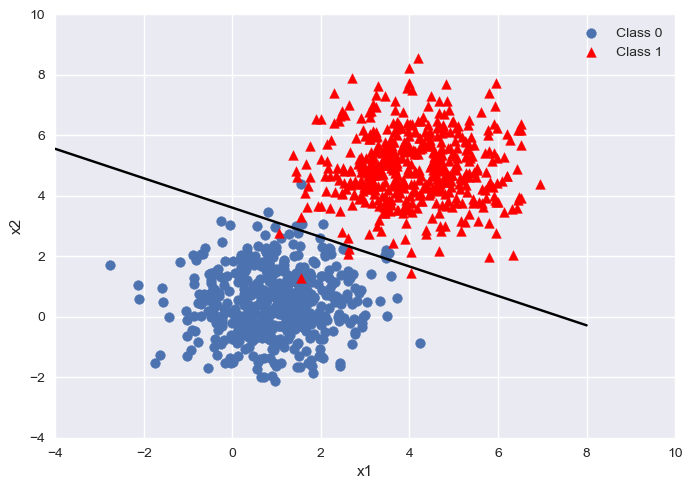

In [397]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-4, 8, 10)
y = -(W[0] * x + b) / W[1]
plt.plot(x, y, color='k')
# ax +by + c = 0
# y = -c - ax / b
plt.legend()
plt.show()

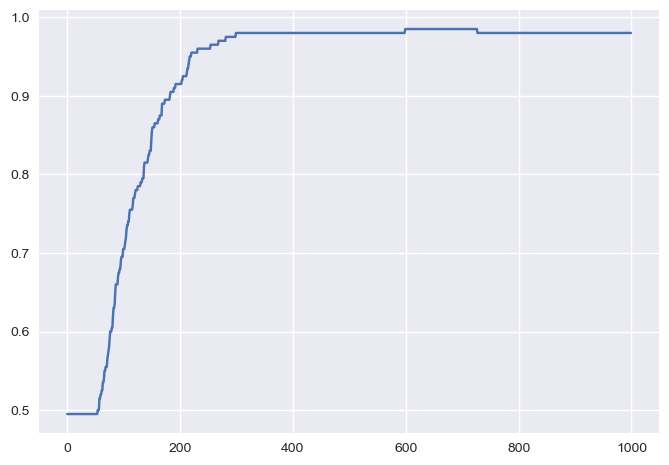

In [414]:
plt.plot(accuracy)
plt.show()